## Importandodados que iremos utilizar

In [21]:
import pandas as pd
import numpy as np


dados = pd.read_pickle("dados\dados_tratados")
dados = dados.drop(columns=["infection.county","occupation","data","detection.numerico"]) #deletando dados que não vão ser utilizados
dados = dados.reindex() #apenas para ter certezar que os index estão corretos
dados

,populacao,probabilidade,latitude,longitude,agriculture,domestic worker,grazing,hunting and fishing,ignored,mining,other,panning,road construction,tourism,traveler,vegetal exploitation
0,24392,0.012299,-11.92830,-61.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24392,0.004100,-11.92830,-61.9953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90353,0.050911,-9.90571,-63.0325,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90353,0.016602,-9.90571,-63.0325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90353,0.003320,-9.90571,-63.0325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23526,73096,0.075244,-1.75989,-55.8579,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23527,17842,0.005605,-1.54168,-47.1126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23528,17842,0.016814,-1.54168,-47.1126,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23529,32832,0.003046,-6.75290,-51.0858,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Agora podemos começar a trabalhar com os dados

Primeiro vamos normalizar os dados utilizando o sklearn

In [22]:
from sklearn.preprocessing import StandardScaler
FEATURES = [ "populacao", "latitude", "longitude", "agriculture", "domestic worker", "grazing", "hunting and fishing", "ignored", "mining", "other", "panning", "road construction", "tourism", "traveler", "vegetal exploitation"]
TARGET = ["probabilidade"]
sc = StandardScaler()
dados_normalizados = sc.fit_transform(dados[FEATURES].values)
#sc.fit(dados)
#dados_normalizados = sc.transform(dados[FEATURES])
print(np.shape(dados_normalizados))

(23531, 15)


Depois de normalizado podemos rodar o PCA, que também é do sklearn

In [23]:
from sklearn.decomposition import PCA 
import numpy as np
pca = PCA()
pca.fit(dados_normalizados)
dados_pca = pca.transform(dados_normalizados)

Agora podemos plotar os dados depois de utilizar o PCA para assim ser possivel analizar o PCA.

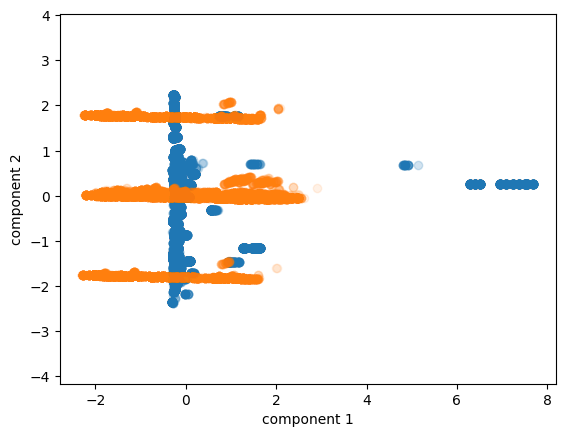

In [24]:
import matplotlib.pyplot as plt
plt.scatter(dados_normalizados[:, 0], dados_normalizados[:, 1], alpha=0.2)
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

Para melhorar a visualização iremos colorir o grafico em função da probabilidade.

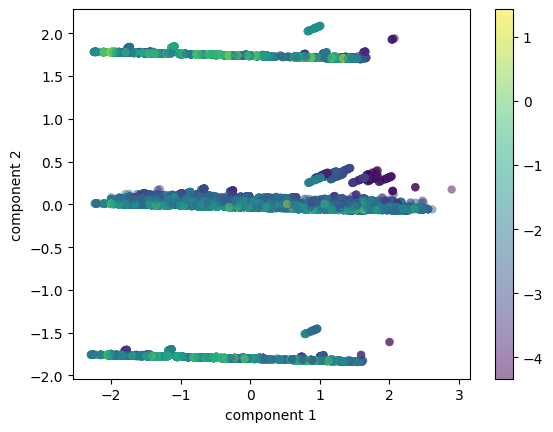

In [32]:
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], edgecolor='none', alpha=0.5, c=np.log10(dados["probabilidade"].values))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

Para visualizar melhor os dados podemos plotar utilizando 3 relaçôes utilizando um grafico 3d

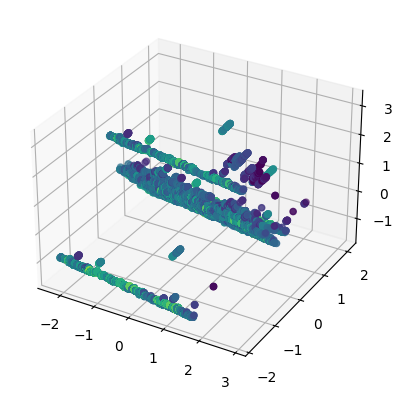

In [33]:
ax = plt.axes(projection='3d')
ax.scatter3D(dados_pca[:, 0], dados_pca[:, 1], dados_pca[:, 2], c=np.log10(dados["probabilidade"].values))
plt.show()

Podemos mostrar a tabela das combinações das features para enternder nosso PCA.

In [34]:
component_names = [f"PC{i+1}" for i in range(dados_pca.shape[1])]
dados_pca_df = pd.DataFrame(dados_pca, columns=component_names)
dados_pca_df.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=FEATURES,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
populacao,0.128073,0.044240,0.194621,0.433650,-0.239919,-0.140365,-0.168982,-0.047151,0.136942,-0.058889,-0.044847,0.087030,0.781644,-0.069967,1.448033e-16
latitude,0.658602,-0.013958,-0.064007,-0.138908,0.020306,0.090482,-0.013924,-0.092059,-0.080638,-0.086916,-0.145762,-0.085697,-0.053453,-0.692736,1.428580e-16
longitude,0.665131,-0.015090,-0.111603,-0.148295,-0.099667,-0.027386,0.022945,-0.065439,-0.035448,-0.032522,-0.101785,-0.007472,0.029093,0.702750,-1.936676e-16
agriculture,-0.120021,-0.712172,-0.485166,-0.084619,-0.104260,-0.026311,-0.075026,-0.045264,0.035739,-0.045495,-0.076404,0.005317,0.154524,-0.031888,4.272140e-01
domestic worker,-0.089969,-0.007705,0.603489,-0.642255,-0.160548,-0.030627,-0.077369,-0.055888,0.033048,-0.050183,-0.092122,0.003030,0.131097,-0.000737,3.873482e-01
grazing,-0.035916,0.008021,0.123797,0.252487,-0.060435,-0.221669,0.780283,-0.311788,-0.162347,-0.109341,-0.220911,-0.076641,-0.058622,-0.008246,2.534481e-01
hunting and fishing,0.116570,-0.006830,0.115246,0.108925,0.890744,-0.164436,-0.089538,0.022628,0.100440,0.008881,-0.004653,0.043848,0.101058,0.056849,3.266023e-01
ignored,0.104331,-0.000376,0.034937,0.050228,-0.058432,-0.011073,-0.000868,-0.168404,-0.188726,-0.384642,0.855078,0.053853,-0.037504,-0.008325,1.853959e-01
mining,0.058909,0.006953,0.053142,0.134444,-0.117783,-0.097203,-0.113196,-0.070817,0.138250,-0.093667,-0.145303,0.877152,-0.320896,-0.037982,1.077969e-01
other,-0.103308,0.699893,-0.509353,-0.141877,-0.079034,-0.016619,-0.062447,-0.040543,0.027881,-0.040458,-0.071517,0.001473,0.124990,-0.027599,4.288672e-01


Tendo as componentes podemos plotar o gráfico da variância explicada para entender melhor as componentes criadas e com isso verificando quanto cada componente representa dos dados reais.

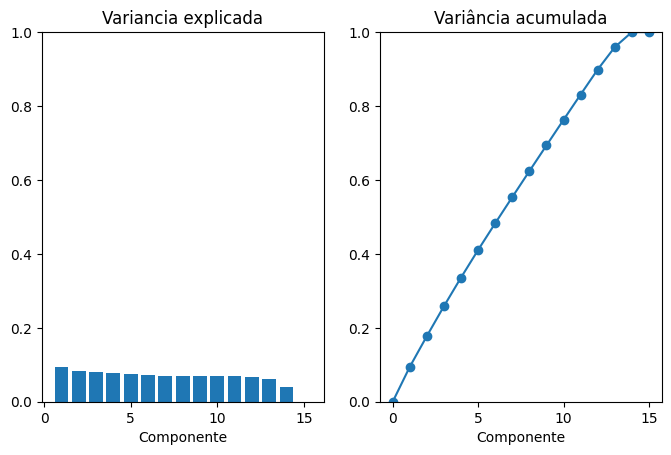

In [35]:
def plot_variance(pca):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)
plt.show()

### Como agora temos as componentes podemos utilizar para realizar regresão 
Primeiro temos que dividir em treino e teste

In [64]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    dados_pca,                                           #Dados das componentes principais do PCA
    dados[TARGET].values,                                               #Dados do target
    test_size=0.2,                                   #Tamanho do conjunto de teste
    random_state=41)                                 #Semente aleatória

Para melhor visualização podemos criar um dataframe com os dados e calcular a correlação.

In [62]:
df_pca_train = pd.DataFrame(
    dados_pca, columns=[f"PC{i+1}" for i in range(dados_pca.shape[1])]
)  # Define as colunas das PC em um dataframe, utilizando os dados do X_pca
df_pca_train["probabilidade"] = dados[TARGET]  # Adiciona a coluna preço, com os dados de y
print(df_pca_train.head(10))  # Exibe as 10 primeiras linhas do dataset
corrmat = df_pca_train.corr()  # Cálculo da correlação
print(round(corrmat, 4))  # Exibe a correlação com 4 casas decimais

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.712732 -1.767828 -1.070086  0.035769 -0.230163 -0.208915 -0.116744   
1 -1.563358  0.054616  0.672365  1.317075 -0.224159 -1.081184  3.374681   
2 -1.444765 -1.762010 -1.038975  0.091779 -0.262613 -0.192267 -0.168197   
3 -1.392547  0.005138  1.850963 -1.474622 -0.445466 -0.211022 -0.194078   
4 -1.295391  0.060434  0.703476  1.373085 -0.256609 -1.064536  3.323228   
5 -0.760429  0.004043  0.558007  0.662095  2.925260 -0.666354 -0.273909   
6 -0.539601  0.024303  0.381609  0.594948 -0.338922 -0.190268  0.015193   
7 -1.401792  1.777356 -1.094786 -0.050639 -0.198497 -0.167767 -0.136002   
8 -0.561329  0.041035  0.476569  0.903860 -0.650427 -0.616196 -0.450866   
9 -2.019706 -1.762841 -1.033056  0.085048 -0.190844 -0.206136 -0.115803   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.095000  0.217542  0.082647  0.140357  0.164889  0.285493  1.188160   
1 -1.111155 -0.559439 -0

Agora podemos treinar o modelo, utilizando o modelo já criado de floresta de decisão

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, max_error
from math import sqrt
n_estimators, max_features,criterio = 58, None, "squared_error"
modelo_rf = RandomForestRegressor(
        criterion=criterio,
        n_estimators=n_estimators,
        max_features=max_features,
        random_state=41,
        n_jobs=4,
    )
modelo_rf.fit(X_treino[:,:1],  y_treino.ravel())
y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste[:,:1])
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
RRMSE = RMSE / sqrt(sum(y_previsao**2)) # Fórmula do RRMSE
erro_maximo = max_error(y_verdadeiro, y_previsao)
print(
    f"O RRMSE do modelo floresta de decisão foi de {RRMSE} e o erro maximo foi {erro_maximo}."
)

O RRMSE do modelo floresta de decisão foi de 0.010746436906415514 e o erro maximo foi 13.537928421527452.
